In [10]:
import pandas as pd
df=pd.read_csv("Advertising.csv",usecols=[1,2,3,4])
df.head(10)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [12]:
import seaborn as sns

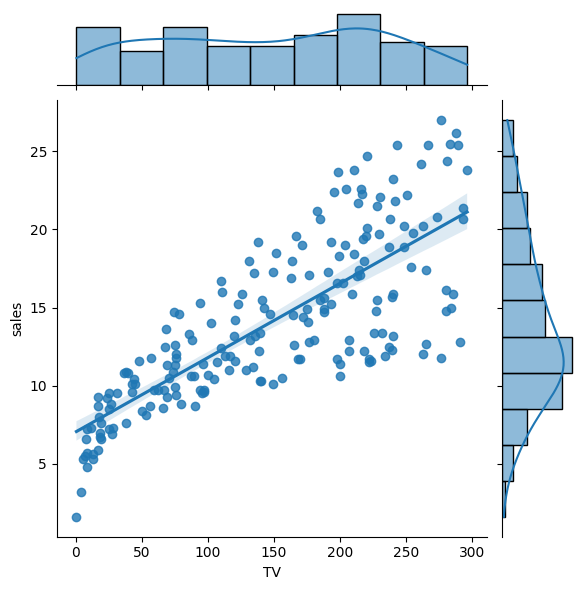

In [15]:
sns.jointplot(x="TV",y="sales",data=df,kind="reg")

In [20]:
from sklearn.linear_model import LinearRegression


In [27]:
x=df[["TV"]]
y=df[["sales"]]

In [29]:
regression=LinearRegression()
model=regression.fit(x,y)
model

LinearRegression()

In [41]:
model.coef_ # katsayı

array([[0.04753664]])

In [42]:
model.intercept_  #sabit katsayı

array([7.03259355])

In [43]:
model.score(x,y)  #r kare değeri # modelin %61 i açıklanıyor

0.611875050850071

<Axes: xlabel='TV', ylabel='sales'>

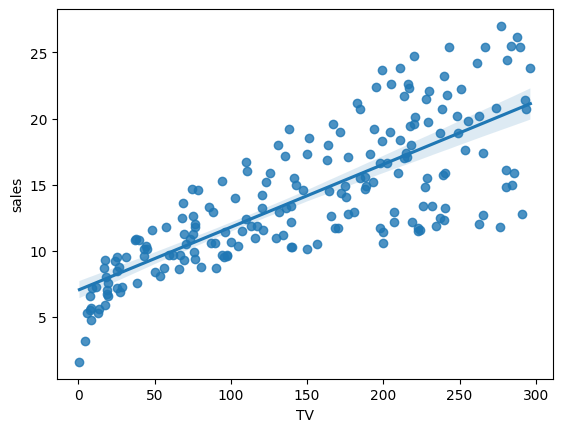

In [44]:
sns.regplot(x=x,y=y)

In [45]:

value=[[165]]
model.predict(value)

C:\Users\msı\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[14.87613922]])

In [46]:
value=[[165],[100],[250]]
model.predict(value)

C:\Users\msı\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[14.87613922],
       [11.78625759],
       [18.91675366]])

In [48]:
real=y
predict_data=model.predict(x)
predict_data=pd.DataFrame(predict_data)

In [51]:
hatalar=pd.concat([real,predict_data],axis=1)
hatalar.columns=["real","predict"]

In [52]:
hatalar

,real,predict
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
...,...,...
195,7.6,8.848493
196,9.7,11.510545
197,12.8,15.446579
198,25.5,20.513985


In [53]:
hatalar["error"]=hatalar["real"]-hatalar["predict"]
hatalar

,real,predict,error
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
...,...,...,...
195,7.6,8.848493,-1.248493
196,9.7,11.510545,-1.810545
197,12.8,15.446579,-2.646579
198,25.5,20.513985,4.986015


In [61]:
hata=(hatalar["error"]**2).sum()/len(hatalar["error"])

In [62]:
hata

10.512652915656757